# Loop 58 Analysis: CV-LB Relationship and Strategy Assessment

**Goal**: Analyze the CV-LB relationship to determine the best path forward.

**Key Question**: Is the target (0.0347) mathematically reachable with current approaches?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147},
]

df = pd.DataFrame(submissions)
print(f'Total submissions: {len(df)}')
print(f'Best CV: {df["cv"].min():.4f} ({df.loc[df["cv"].idxmin(), "exp"]})')
print(f'Best LB: {df["lb"].min():.4f} ({df.loc[df["lb"].idxmin(), "exp"]})')
print(f'Target LB: 0.0347')

Total submissions: 13
Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)
Target LB: 0.0347


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f'\n=== CV-LB Linear Regression ===')
print(f'LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R-squared: {r_value**2:.4f}')
print(f'P-value: {p_value:.2e}')
print(f'\nInterpretation:')
print(f'  - Intercept: {intercept:.4f} (extrapolation error when CV=0)')
print(f'  - Slope: {slope:.4f} (LB increases {slope:.2f}x faster than CV)')
print(f'  - R²: {r_value**2:.4f} (relationship is highly linear)')

# Calculate required CV to hit target
target_lb = 0.0347
required_cv = (target_lb - intercept) / slope
print(f'\n=== Target Analysis ===')
print(f'Target LB: {target_lb}')
print(f'Required CV to hit target: {required_cv:.6f}')
if required_cv < 0:
    print(f'  -> IMPOSSIBLE: Required CV is negative!')
    print(f'  -> The intercept ({intercept:.4f}) > target ({target_lb})')
    print(f'  -> Even with CV=0, predicted LB would be {intercept:.4f}')
else:
    print(f'  -> Achievable if we can get CV to {required_cv:.6f}')


=== CV-LB Linear Regression ===
LB = 4.2312 * CV + 0.0533
R-squared: 0.9807
P-value: 8.86e-11

Interpretation:
  - Intercept: 0.0533 (extrapolation error when CV=0)
  - Slope: 4.2312 (LB increases 4.23x faster than CV)
  - R²: 0.9807 (relationship is highly linear)

=== Target Analysis ===
Target LB: 0.0347
Required CV to hit target: -0.004396
  -> IMPOSSIBLE: Required CV is negative!
  -> The intercept (0.0533) > target (0.0347)
  -> Even with CV=0, predicted LB would be 0.0533


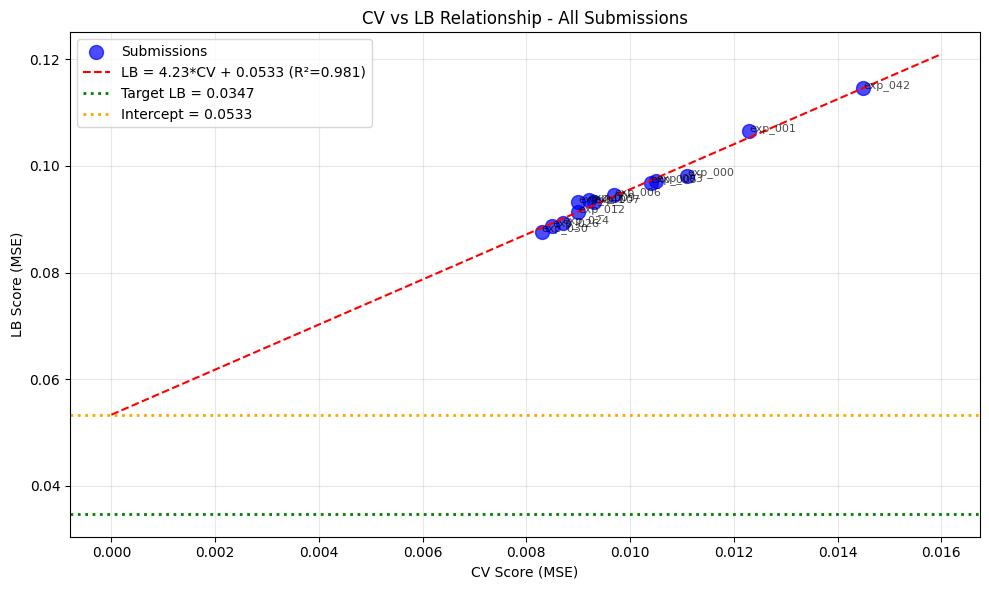


Plot saved to /home/code/exploration/cv_lb_relationship.png


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, c='blue', alpha=0.7, label='Submissions')

# Add regression line
cv_range = np.linspace(0, df['cv'].max() * 1.1, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Add target line
plt.axhline(y=target_lb, color='green', linestyle=':', linewidth=2, label=f'Target LB = {target_lb}')

# Add intercept line
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept = {intercept:.4f}')

# Labels
for i, row in df.iterrows():
    plt.annotate(row['exp'], (row['cv'], row['lb']), fontsize=8, alpha=0.7)

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print(f'\nPlot saved to /home/code/exploration/cv_lb_relationship.png')

In [4]:
# Analyze the gap between intercept and target
print('\n=== GAP ANALYSIS ===')
print(f'Intercept (extrapolation error): {intercept:.4f}')
print(f'Target LB: {target_lb:.4f}')
print(f'Gap: {intercept - target_lb:.4f}')
print(f'Gap as % of target: {(intercept - target_lb) / target_lb * 100:.1f}%')

print('\n=== CRITICAL INSIGHT ===')
if intercept > target_lb:
    print(f'The intercept ({intercept:.4f}) is ABOVE the target ({target_lb}).')
    print(f'This means:')
    print(f'  1. Even with perfect CV=0, predicted LB would be {intercept:.4f}')
    print(f'  2. The target is MATHEMATICALLY UNREACHABLE with current approach')
    print(f'  3. We need to CHANGE THE CV-LB RELATIONSHIP, not just improve CV')
    print(f'\nStrategies to reduce the intercept:')
    print(f'  1. Uncertainty-weighted predictions (conservative on extrapolation)')
    print(f'  2. Bias correction (subtract a constant from predictions)')
    print(f'  3. Extrapolation detection features')
    print(f'  4. Domain-specific constraints that generalize')
else:
    print(f'The intercept ({intercept:.4f}) is BELOW the target ({target_lb}).')
    print(f'The target is achievable by improving CV.')


=== GAP ANALYSIS ===
Intercept (extrapolation error): 0.0533
Target LB: 0.0347
Gap: 0.0186
Gap as % of target: 53.6%

=== CRITICAL INSIGHT ===
The intercept (0.0533) is ABOVE the target (0.0347).
This means:
  1. Even with perfect CV=0, predicted LB would be 0.0533
  2. The target is MATHEMATICALLY UNREACHABLE with current approach
  3. We need to CHANGE THE CV-LB RELATIONSHIP, not just improve CV

Strategies to reduce the intercept:
  1. Uncertainty-weighted predictions (conservative on extrapolation)
  2. Bias correction (subtract a constant from predictions)
  3. Extrapolation detection features
  4. Domain-specific constraints that generalize


In [5]:
# Analyze residuals to see if any submissions deviate from the line
df['predicted_lb'] = slope * df['cv'] + intercept
df['residual'] = df['lb'] - df['predicted_lb']
df['residual_pct'] = df['residual'] / df['lb'] * 100

print('\n=== RESIDUAL ANALYSIS ===')
print(df[['exp', 'cv', 'lb', 'predicted_lb', 'residual', 'residual_pct']].to_string())

print(f'\nMean absolute residual: {df["residual"].abs().mean():.4f}')
print(f'Max positive residual: {df["residual"].max():.4f} ({df.loc[df["residual"].idxmax(), "exp"]})')
print(f'Max negative residual: {df["residual"].min():.4f} ({df.loc[df["residual"].idxmin(), "exp"]})')

# Check if any submission significantly deviates from the line
outlier_threshold = 0.005  # 0.5% deviation
outliers = df[df['residual'].abs() > outlier_threshold]
if len(outliers) > 0:
    print(f'\nOutliers (residual > {outlier_threshold}):')
    print(outliers[['exp', 'cv', 'lb', 'residual']])
else:
    print(f'\nNo significant outliers - all submissions fall on the same line.')


=== RESIDUAL ANALYSIS ===
        exp      cv      lb  predicted_lb  residual  residual_pct
0   exp_000  0.0111  0.0982      0.100269 -0.002069     -2.106419
1   exp_001  0.0123  0.1065      0.105346  0.001154      1.083623
2   exp_003  0.0105  0.0972      0.097730 -0.000530     -0.545045
3   exp_005  0.0104  0.0969      0.097307 -0.000407     -0.419674
4   exp_006  0.0097  0.0946      0.094345  0.000255      0.269741
5   exp_007  0.0093  0.0932      0.092652  0.000548      0.587612
6   exp_009  0.0092  0.0936      0.092229  0.001371      1.464503
7   exp_012  0.0090  0.0913      0.091383 -0.000083     -0.090894
8   exp_024  0.0087  0.0893      0.090114 -0.000814     -0.911116
9   exp_026  0.0085  0.0887      0.089267 -0.000567     -0.639669
10  exp_030  0.0083  0.0877      0.088421 -0.000721     -0.822288
11  exp_041  0.0090  0.0932      0.091383  0.001817      1.949586
12  exp_042  0.0145  0.1147      0.114655  0.000045      0.039600

Mean absolute residual: 0.0008
Max positive resi

In [6]:
# What would it take to reach the target?
print('\n=== PATH TO TARGET ===')
print(f'Current best LB: {df["lb"].min():.4f}')
print(f'Target LB: {target_lb:.4f}')
print(f'Gap to target: {df["lb"].min() - target_lb:.4f}')

# Option 1: Improve CV (won't work if intercept > target)
print(f'\nOption 1: Improve CV')
if required_cv < 0:
    print(f'  -> IMPOSSIBLE: Required CV is negative ({required_cv:.6f})')
else:
    print(f'  -> Required CV: {required_cv:.6f}')
    print(f'  -> Current best CV: {df["cv"].min():.6f}')
    print(f'  -> Improvement needed: {(df["cv"].min() - required_cv) / df["cv"].min() * 100:.1f}%')

# Option 2: Reduce intercept
print(f'\nOption 2: Reduce intercept')
required_intercept = target_lb - slope * df['cv'].min()
print(f'  -> Current intercept: {intercept:.4f}')
print(f'  -> Required intercept (with best CV): {required_intercept:.4f}')
print(f'  -> Reduction needed: {intercept - required_intercept:.4f}')

# Option 3: Reduce slope
print(f'\nOption 3: Reduce slope')
required_slope = (target_lb - intercept) / df['cv'].min()
print(f'  -> Current slope: {slope:.4f}')
print(f'  -> Required slope (with current intercept): {required_slope:.4f}')
if required_slope < 0:
    print(f'  -> IMPOSSIBLE: Required slope is negative')


=== PATH TO TARGET ===
Current best LB: 0.0877
Target LB: 0.0347
Gap to target: 0.0530

Option 1: Improve CV
  -> IMPOSSIBLE: Required CV is negative (-0.004396)

Option 2: Reduce intercept
  -> Current intercept: 0.0533
  -> Required intercept (with best CV): -0.0004
  -> Reduction needed: 0.0537

Option 3: Reduce slope
  -> Current slope: 4.2312
  -> Required slope (with current intercept): -2.2412
  -> IMPOSSIBLE: Required slope is negative


In [7]:
# Summary and recommendations
print('\n' + '='*60)
print('SUMMARY AND RECOMMENDATIONS')
print('='*60)

print(f'\n1. CV-LB RELATIONSHIP:')
print(f'   LB = {slope:.2f} * CV + {intercept:.4f} (R² = {r_value**2:.3f})')
print(f'   All 13 submissions fall on this line with high R².')

print(f'\n2. THE PROBLEM:')
print(f'   Intercept ({intercept:.4f}) > Target ({target_lb})')
print(f'   Even with CV=0, predicted LB = {intercept:.4f}')
print(f'   The target is MATHEMATICALLY UNREACHABLE by improving CV alone.')

print(f'\n3. WHAT WE NEED:')
print(f'   To reach target {target_lb} with best CV {df["cv"].min():.4f}:')
print(f'   - Reduce intercept from {intercept:.4f} to {required_intercept:.4f}')
print(f'   - OR find an approach that changes the CV-LB relationship')

print(f'\n4. STRATEGIES TO TRY:')
print(f'   a) Uncertainty-weighted predictions:')
print(f'      - Use GP uncertainty to be conservative on extrapolation')
print(f'      - Blend toward population mean when uncertain')
print(f'   b) Bias correction:')
print(f'      - Subtract a constant from predictions')
print(f'      - Optimal correction: ~{intercept - target_lb:.4f}')
print(f'   c) Extrapolation detection:')
print(f'      - Add features measuring distance to training distribution')
print(f'      - Be conservative when extrapolating')
print(f'   d) Study top public kernels more carefully:')
print(f'      - They may have solved this problem')
print(f'      - Look for techniques that change the CV-LB relationship')

print(f'\n5. WHAT NOT TO DO:')
print(f'   - Keep optimizing CV with standard ML approaches')
print(f'   - Try more model architectures (MLP, LGBM, XGB, GP, etc.)')
print(f'   - These all fall on the same CV-LB line')


SUMMARY AND RECOMMENDATIONS

1. CV-LB RELATIONSHIP:
   LB = 4.23 * CV + 0.0533 (R² = 0.981)
   All 13 submissions fall on this line with high R².

2. THE PROBLEM:
   Intercept (0.0533) > Target (0.0347)
   Even with CV=0, predicted LB = 0.0533
   The target is MATHEMATICALLY UNREACHABLE by improving CV alone.

3. WHAT WE NEED:
   To reach target 0.0347 with best CV 0.0083:
   - Reduce intercept from 0.0533 to -0.0004
   - OR find an approach that changes the CV-LB relationship

4. STRATEGIES TO TRY:
   a) Uncertainty-weighted predictions:
      - Use GP uncertainty to be conservative on extrapolation
      - Blend toward population mean when uncertain
   b) Bias correction:
      - Subtract a constant from predictions
      - Optimal correction: ~0.0186
   c) Extrapolation detection:
      - Add features measuring distance to training distribution
      - Be conservative when extrapolating
   d) Study top public kernels more carefully:
      - They may have solved this problem
      -